# Homework 3

please run the deep learning for MNIST Fashion dataset and get the prediction of N-th image from the test images,   
where N means that the last 4-digit number for your student ID number.  
For example, my ID is 19973846  
Prediction for the Test image at [3846]  
[1.8334597e-03 1.0655230e-08 5.0503830e-03 9.8779637e-01 4.3538664e-03 4.4025924e-08 9.6573838e-04 2.3326441e-12 1.6982273e-07 8.1142187e-10]  
98.78% to be predicted as Dress  

### Submit   
(1) prediction values,  
(2) prediction class name,  
(3) the test image,  
(4) the test image true class name, and  
(5) code.  

In [17]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Preprocess the data
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten the images for the input layer
train_images = train_images.reshape((train_images.shape[0], 28, 28))
test_images = test_images.reshape((test_images.shape[0], 28, 28))



In [23]:
# Build the model
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5166 - accuracy: 0.8096
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3189 - accuracy: 0.8826
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2697 - accuracy: 0.9018
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2424 - accuracy: 0.9120
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2247 - accuracy: 0.9183
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2115 - accuracy: 0.9230
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1987 - accuracy: 0.9293
Epoch 8/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1908 - accuracy: 0.9310
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1855 - accuracy: 0.9334
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - l

1/1 [==============================] - 0s 59ms/step
(1) Prediction values:
[2.3673468e-04 1.2950430e-08 1.8461486e-02 3.8110058e-05 2.4096752e-03
 5.6616082e-05 9.7878325e-01 8.4655731e-09 8.4660705e-06 5.6517438e-06]

(2) Predicted class name: Shirt


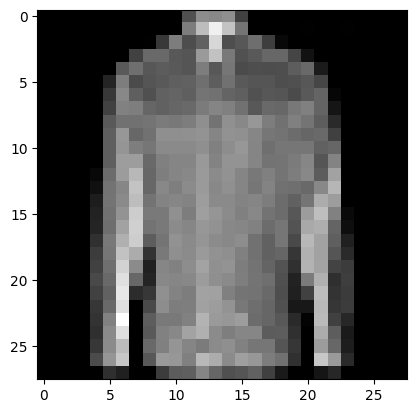


(4) True class name: Shirt


In [24]:
student_id_last_4_digits = 4531

prediction = model.predict(test_images[student_id_last_4_digits].reshape(1, 28, 28))
print("(1) Prediction values:")
print(prediction[0])
predicted_class = np.argmax(prediction[0])
predicted_class_name = class_names[predicted_class]
print("\n(2) Predicted class name:", predicted_class_name)

plt.imshow(test_images[student_id_last_4_digits].reshape(28, 28), cmap='gray')
plt.show()

true_class = test_labels[student_id_last_4_digits]
true_class_name = class_names[true_class]
print("\n(4) True class name:", true_class_name)